# Analyzing Music Track Scores Using Machine Learning: From Linear Models to Boosting

## load the necessary libraries for initial Data Analysis and further Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
filepath = '/Users/peekaboo645/Desktop/cv/optimized cv/kaggle/Most Streamed Spotify Songs 2024.csv'
df = pd.read_csv(filepath,encoding='ISO-8859-1')

In [3]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


## Understanding the data

In [4]:
df.shape

(4600, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [6]:
#drop column
df.drop('ISRC', axis=1, inplace=True)

In [7]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'All Time Rank',
       'Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
       'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

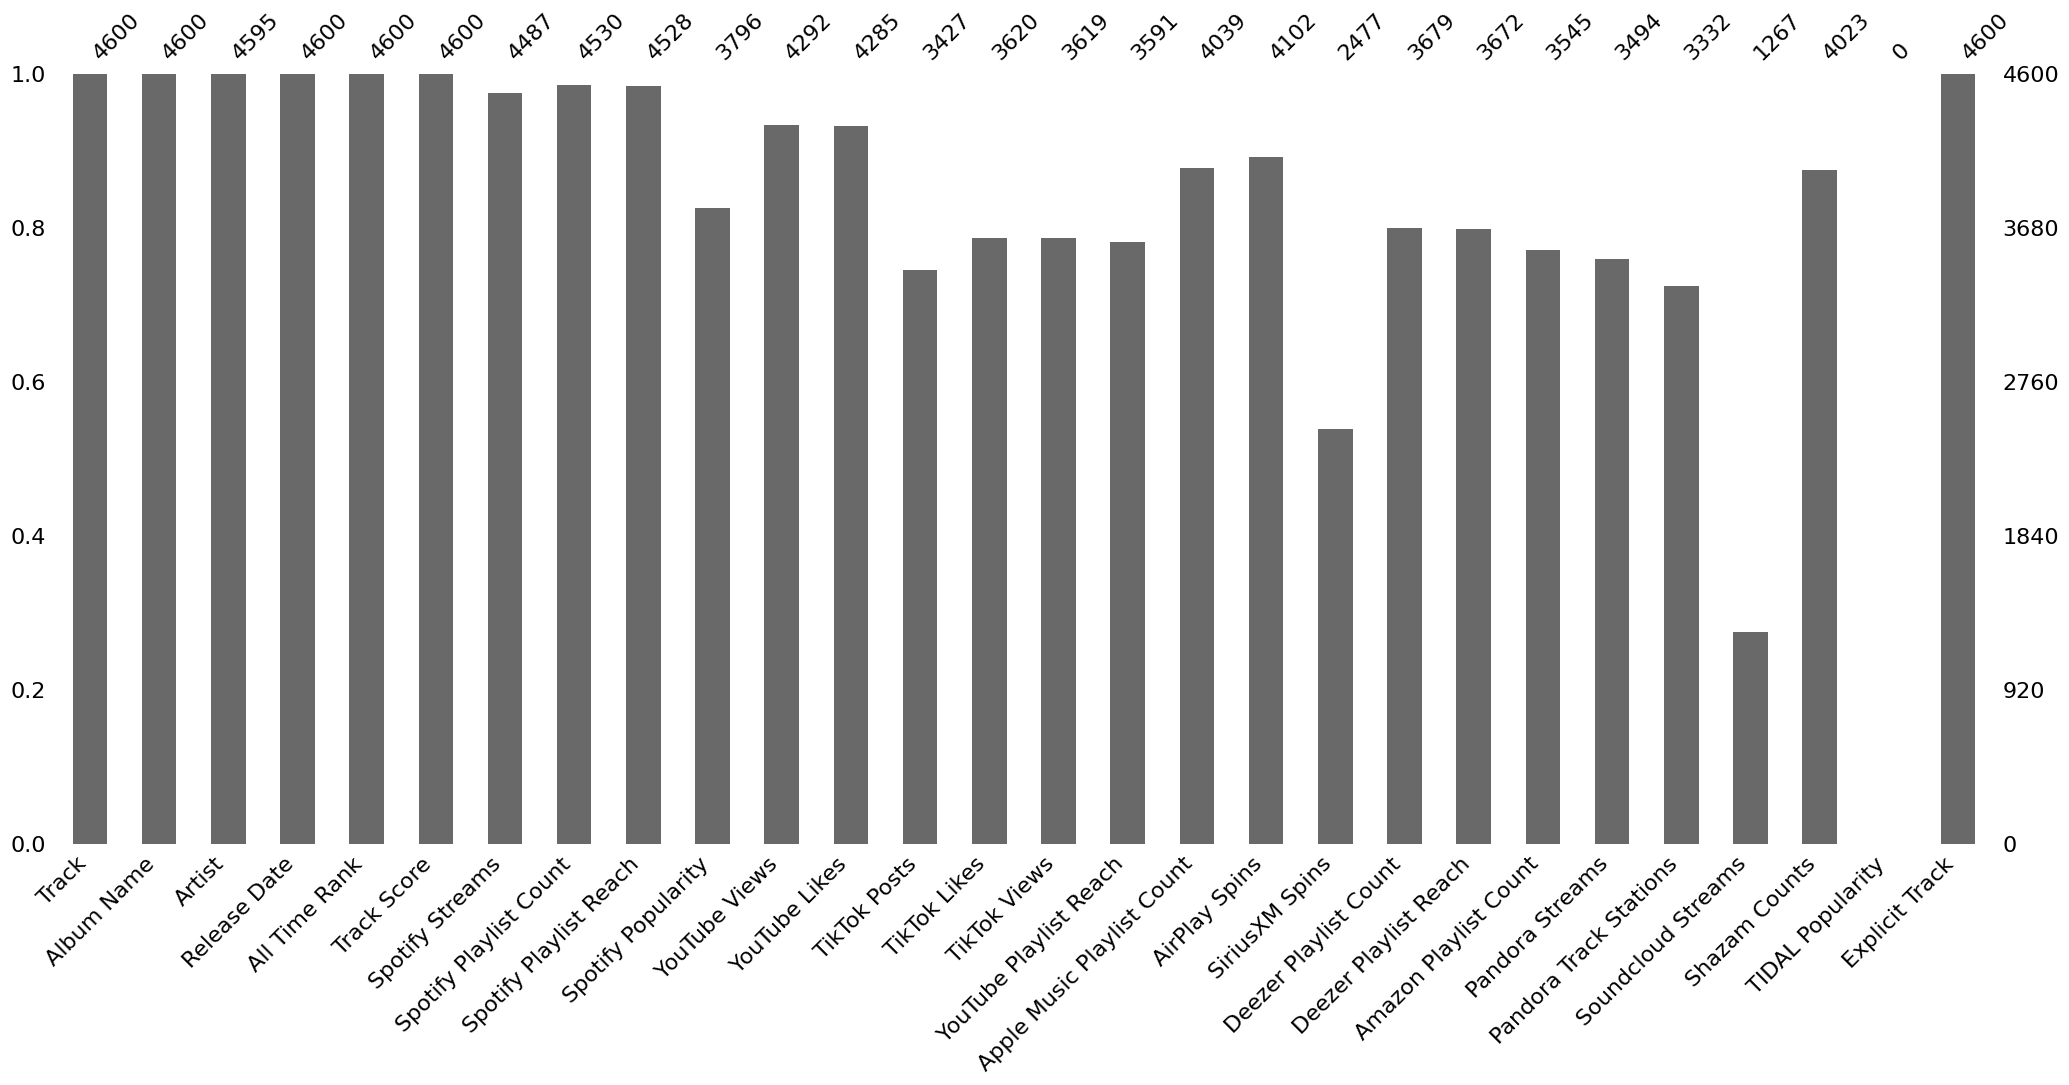

In [8]:
import missingno as msno
msno.bar(df)
plt.show()

In [9]:
df.isnull().sum().sort_values(ascending=False)

TIDAL Popularity              4600
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
Artist                           5
Track                            0
Album Name                       0
Track Score                      0
All Time Rank                    0
Release Date                     0
Explicit Track                   0
dtype: int64

FEATURE ENGG


In [10]:
df.drop(['TIDAL Popularity','Soundcloud Streams' ], axis =1 , inplace = True)
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'All Time Rank',
       'Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins',
       'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Shazam Counts', 'Explicit Track'],
      dtype='object')

Formatting the cells in the DF

In [11]:
#removing the commas in the cells
df= df.applymap(lambda x:x.replace(',','') if isinstance(x,str) else x )
df

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,390470936,30716,196631588,92.0,...,210.0,40975,684,62.0,17598718,114.0,18004655,22931,2669262,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,323703884,28113,174597137,92.0,...,188.0,40778,3,67.0,10422430,111.0,7780028,28444,1118279,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,601309283,54331,211607669,92.0,...,190.0,74333,536,136.0,36321847,172.0,5022621,5639,5285340,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,2031280633,269802,136569078,85.0,...,394.0,1474799,2182,264.0,24684248,210.0,190260277,203384,11822942,0
4,Houdini,Houdini,Eminem,5/31/2024,5,423.3,107034922,7223,151469874,88.0,...,182.0,12185,1,82.0,17660624,105.0,4493884,7006,457017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,4585,19.4,305049963,65770,5103054,71.0,...,3.0,6,NaN,2.0,14217,NaN,20104066,13184,656337,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,4575,19.4,52282360,4602,1449767,56.0,...,1.0,412,NaN,1.0,927,NaN,NaN,NaN,193590,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,4571,19.4,189972685,72066,6704802,65.0,...,19.0,204,NaN,1.0,74,6.0,84426740,28999,1135998,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,4591,19.4,145467020,14037,7387064,66.0,...,1.0,1200,NaN,NaN,NaN,7.0,6817840,NaN,448292,0


creating new columns to extract y and month from the datetime

In [12]:
df['Release Date'] = pd.to_datetime(df['Release Date'],format='%m/%d/%Y')
df['year']= df['Release Date'].dt.year
df['month']=df['Release Date'].dt.month
df

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,year,month
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,725.4,390470936,30716,196631588,92.0,...,684,62.0,17598718,114.0,18004655,22931,2669262,0,2024,4
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2,545.9,323703884,28113,174597137,92.0,...,3,67.0,10422430,111.0,7780028,28444,1118279,1,2024,5
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3,538.4,601309283,54331,211607669,92.0,...,536,136.0,36321847,172.0,5022621,5639,5285340,0,2024,3
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4,444.9,2031280633,269802,136569078,85.0,...,2182,264.0,24684248,210.0,190260277,203384,11822942,0,2023,1
4,Houdini,Houdini,Eminem,2024-05-31,5,423.3,107034922,7223,151469874,88.0,...,1,82.0,17660624,105.0,4493884,7006,457017,1,2024,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,4585,19.4,305049963,65770,5103054,71.0,...,NaN,2.0,14217,NaN,20104066,13184,656337,1,2017,9
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,4575,19.4,52282360,4602,1449767,56.0,...,NaN,1.0,927,NaN,NaN,NaN,193590,0,2018,7
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,4571,19.4,189972685,72066,6704802,65.0,...,NaN,1.0,74,6.0,84426740,28999,1135998,1,2020,2
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,4591,19.4,145467020,14037,7387064,66.0,...,NaN,NaN,NaN,7.0,6817840,NaN,448292,0,2016,11


## dealing with duplicates

In [13]:
df.duplicated().sum()

2

In [14]:
#keeping only the first value
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [15]:
#formatting datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4598 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4598 non-null   object        
 1   Album Name                  4598 non-null   object        
 2   Artist                      4593 non-null   object        
 3   Release Date                4598 non-null   datetime64[ns]
 4   All Time Rank               4598 non-null   object        
 5   Track Score                 4598 non-null   float64       
 6   Spotify Streams             4485 non-null   object        
 7   Spotify Playlist Count      4528 non-null   object        
 8   Spotify Playlist Reach      4526 non-null   object        
 9   Spotify Popularity          3794 non-null   float64       
 10  YouTube Views               4290 non-null   object        
 11  YouTube Likes               4283 non-null   object      

In [16]:
for x in df.columns[6:]:
    df.loc[:,x] = pd.to_numeric(df[x])
    print(df[x].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
int64
int64


/var/folders/b0/44_jwyr55dlff8f4qprlfgj00000gn/T/ipykernel_52062/752552957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,x] = pd.to_numeric(df[x])


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4598 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4598 non-null   object        
 1   Album Name                  4598 non-null   object        
 2   Artist                      4593 non-null   object        
 3   Release Date                4598 non-null   datetime64[ns]
 4   All Time Rank               4598 non-null   object        
 5   Track Score                 4598 non-null   float64       
 6   Spotify Streams             4485 non-null   float64       
 7   Spotify Playlist Count      4528 non-null   float64       
 8   Spotify Playlist Reach      4526 non-null   float64       
 9   Spotify Popularity          3794 non-null   float64       
 10  YouTube Views               4290 non-null   float64       
 11  YouTube Likes               4283 non-null   float64     

## Imputing mean for null values in numerical columns using SimpleImputer

In [18]:
from sklearn.impute import SimpleImputer

for col in df.columns[6:]:
    df.loc[:,col] = pd.to_numeric(df[col], errors = "coerce")

imputer = SimpleImputer(strategy = "mean")

for col in df.columns[6:]:
    df.loc[:,col] = imputer.fit_transform(df[[col]])

print(df.isnull().sum())

Track                         0
Album Name                    0
Artist                        5
Release Date                  0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Shazam Counts                 0
Explicit Track                0
year                          0
month                         0
dtype: int64


/var/folders/b0/44_jwyr55dlff8f4qprlfgj00000gn/T/ipykernel_52062/1172474078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = pd.to_numeric(df[col], errors = "coerce")
/var/folders/b0/44_jwyr55dlff8f4qprlfgj00000gn/T/ipykernel_52062/1172474078.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = imputer.fit_transform(df[[col]])
/var/folders/b0/44_jwyr55dlff8f4qprlfgj00000gn/T/ipykernel_52062/1172474078.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

## EDA

In [19]:
selected_columns = df[['Track','Artist','Track Score', 'Spotify Popularity', 'Apple Music Playlist Count',
    'Deezer Playlist Count', 'Amazon Playlist Count', 'Explicit Track','YouTube Views','YouTube Likes','TikTok Views','TikTok Likes','Shazam Counts',
    'year', 'month']]


<AxesSubplot:>

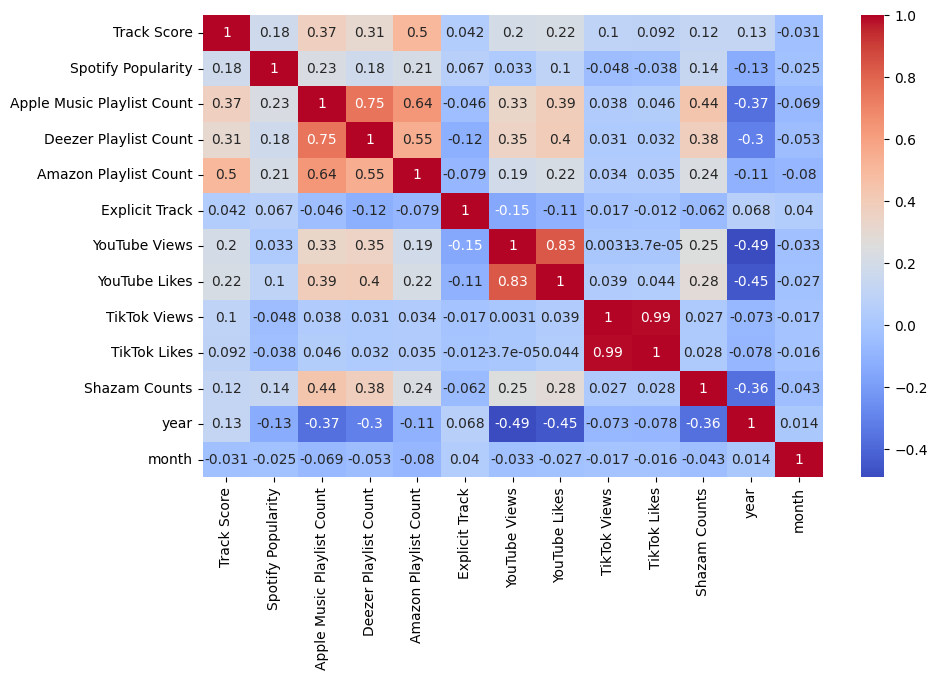

In [20]:
plt.figure(figsize = (10, 6))
numeric_df = selected_columns
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")


In [21]:
numeric_df

,Track,Artist,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track,YouTube Views,YouTube Likes,TikTok Views,TikTok Likes,Shazam Counts,year,month
0,MILLION DOLLAR BABY,Tommy Richman,725.4,92.0,210.0,62.00000,114.000000,0.0,8.427475e+07,1713126.0,5.332282e+09,6.515659e+08,2669262.0,2024.0,4.0
1,Not Like Us,Kendrick Lamar,545.9,92.0,188.0,67.00000,111.000000,1.0,1.163470e+08,3486739.0,2.083390e+08,3.522355e+07,1118279.0,2024.0,5.0
2,i like the way you kiss me,Artemas,538.4,92.0,190.0,136.00000,172.000000,0.0,1.225991e+08,2228730.0,3.369121e+09,2.751542e+08,5285340.0,2024.0,3.0
3,Flowers,Miley Cyrus,444.9,85.0,394.0,264.00000,210.000000,0.0,1.096101e+09,10629796.0,1.460373e+10,1.078758e+09,11822942.0,2023.0,1.0
4,Houdini,Eminem,423.3,88.0,182.0,82.00000,105.000000,1.0,7.737396e+07,3670188.0,1.161724e+09,1.126902e+08,457017.0,2024.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,$uicideboy$,19.4,71.0,3.0,2.00000,25.346034,1.0,1.492477e+08,1397590.0,1.439344e+08,2.020200e+07,656337.0,2017.0,9.0
4596,Dil Meri Na Sune,Atif Aslam,19.4,56.0,1.0,1.00000,25.346034,0.0,9.439202e+08,5347766.0,1.993500e+04,1.721000e+03,193590.0,2018.0,7.0
4597,Grace (feat. 42 Dugg),Lil Baby,19.4,65.0,19.0,1.00000,6.000000,1.0,2.010273e+08,1081402.0,3.684900e+07,5.288677e+06,1135998.0,2020.0,2.0
4598,Nashe Si Chadh Gayi,Arijit Singh,19.4,66.0,1.0,32.32173,7.000000,0.0,1.118595e+09,3868828.0,3.775730e+07,2.534831e+06,448292.0,2016.0,11.0


## Trends Graphs

Text(0.5, 0, 'Year')

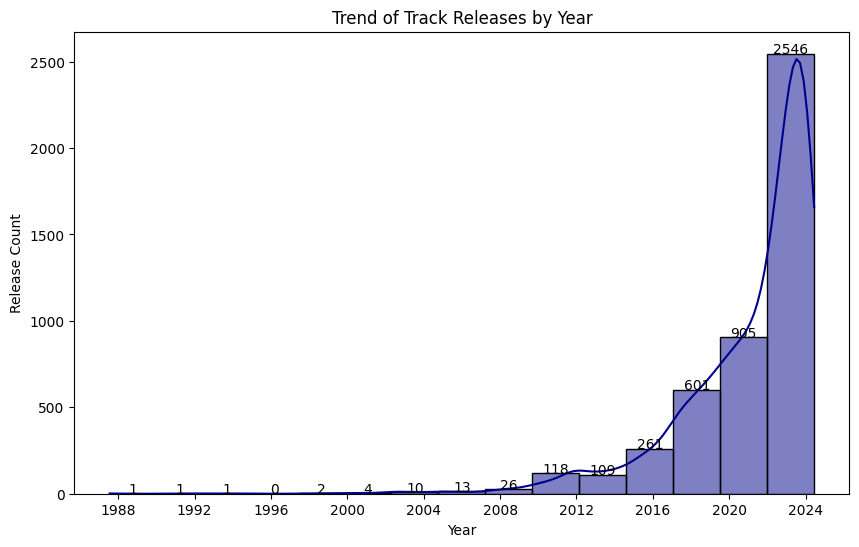

In [22]:
# Trend of Track Releases
plt.figure(figsize = (10, 6))
ax = sns.histplot(df['Release Date'], bins = 15, kde = True, color = 'darkblue')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 0.5, int(height), ha = "center")


plt.title('Trend of Track Releases by Year')
plt.ylabel('Release Count')
plt.xlabel('Year')


## Let's view the release trend in the last 5 years

[Text(1, 0, 'Jan'),
 Text(2, 0, 'Feb'),
 Text(3, 0, 'Mar'),
 Text(4, 0, 'Apr'),
 Text(5, 0, 'May'),
 Text(6, 0, 'Jun'),
 Text(7, 0, 'Jul'),
 Text(8, 0, 'Aug'),
 Text(9, 0, 'Sep'),
 Text(10, 0, 'Oct'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec')]

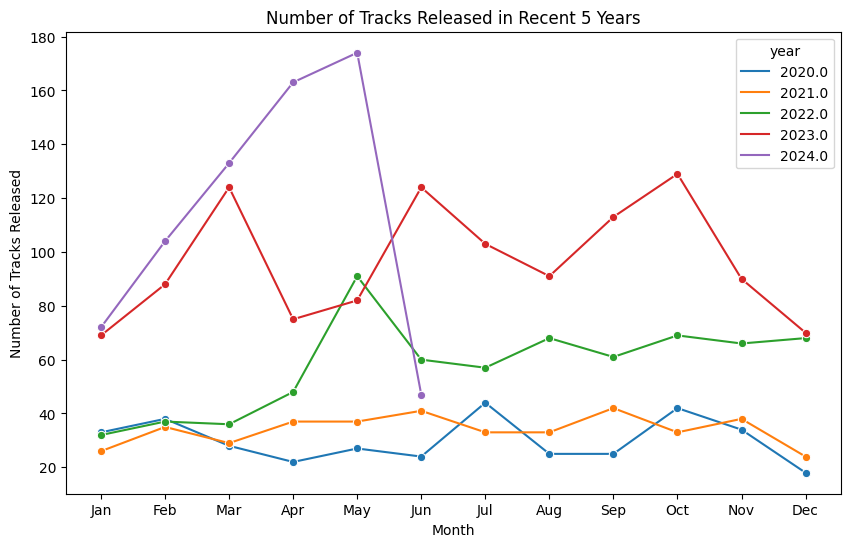

In [23]:
import calendar

plt.figure(figsize = (10,6))

monthly_releases = df.groupby(['year','month']).size().reset_index(name = "Count")
recent_years = monthly_releases.year.unique()[-5:]
recent_data = monthly_releases[monthly_releases['year'].isin(recent_years)]

ax = sns.lineplot(data=recent_data, x='month', y='Count', hue='year', palette='tab10', marker = 'o')
plt.title('Number of Tracks Released in Recent 5 Years')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')

month_names = [calendar.month_abbr[i] for i in range(1,13)]
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)

<AxesSubplot:xlabel='Spotify Streams', ylabel='Spotify Playlist Count'>

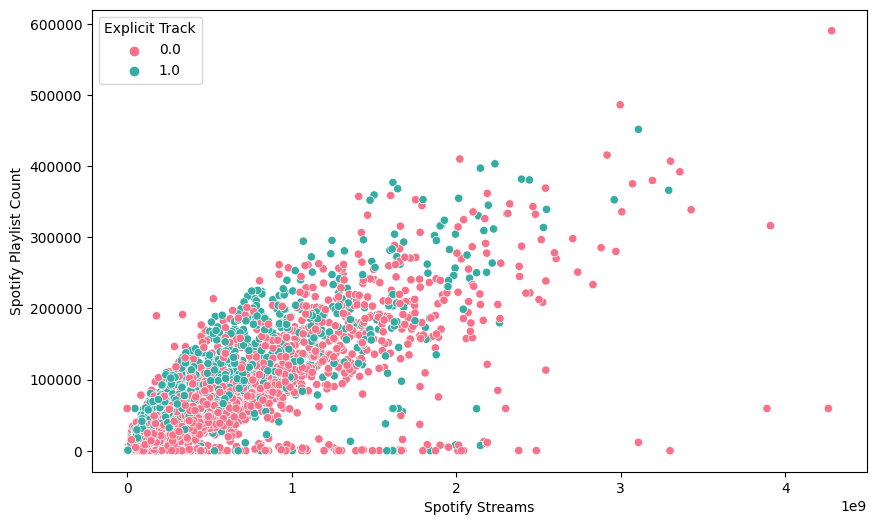

In [24]:
#Spotify Streams vs Playlist Counts with Explicit Content
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Spotify Streams', y = 'Spotify Playlist Count', hue = 'Explicit Track',data = df, palette = 'husl')


In [25]:
#sort df by year
df_sort_by_year = df.sort_values(by='year')
df_sort_by_year

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,year,month
3978,Sweet Child O' Mine,Appetite For Destruction,Guns N' Roses,1987-07-21,3931,21.5,1.879386e+09,295491.000000,9.603205e+07,80.000000,...,416.000000,215.00000,3.290536e+06,107.000000,8.850469e+08,4.446060e+05,1.034552e+07,1.0,1987.0,7.0
4522,Smells Like Teen Spirit,Nevermind (30th Anniversary Edition Super Deluxe),Nirvana,1991-09-24,4510,19.6,2.021910e+09,410054.000000,1.134070e+08,77.000000,...,287.000000,256.00000,3.993523e+06,97.000000,6.919795e+08,3.179660e+05,1.277544e+07,0.0,1991.0,9.0
2107,All I Want for Christmas Is You,Merry Christmas,Mariah Carey,1994-01-01,2097,31.5,1.810650e+09,109411.000000,4.500397e+07,60.000000,...,139.000000,143.00000,1.390899e+06,125.000000,3.044973e+08,3.556791e+06,6.531412e+06,0.0,1994.0,1.0
4167,Beautiful Girls,Groove So Much !,Sean Kingston,1998-04-03,4155,20.8,1.783399e+08,189706.000000,7.737384e+07,72.000000,...,89.000000,75.00000,7.920500e+05,12.000000,2.082196e+08,2.221530e+05,4.403782e+06,0.0,1998.0,4.0
3729,Californication,Californication (Deluxe Version),Red Hot Chili Peppers,1999-06-08,3730,22.2,1.405354e+09,276377.000000,1.153155e+08,79.000000,...,79.000000,268.00000,1.064069e+06,30.000000,5.824100e+08,2.175170e+05,2.529828e+06,0.0,1999.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Pink Skies,Pink Skies,Zach Bryan,2024-05-24,309,86.7,6.024074e+07,4611.000000,9.857063e+07,84.000000,...,1.000000,26.00000,5.164376e+06,79.000000,5.006041e+06,2.349000e+03,1.568860e+05,0.0,2024.0,5.0
2912,Funk Estranho,Funk Estranho - Single,prod.67,2024-05-31,2902,25.9,3.589000e+03,59397.509496,2.335177e+07,15.000000,...,257.534949,32.32173,1.295634e+06,25.346034,8.569817e+07,8.791929e+04,5.890070e+05,0.0,2024.0,5.0
2910,icantbelieveiletyougetaway,icantbelieveiletyougetaway,aldn,2024-05-31,2896,25.9,3.162942e+06,520.000000,4.539512e+06,63.000000,...,257.534949,32.32173,1.295634e+06,25.346034,3.490000e+03,2.600000e+01,4.674600e+04,0.0,2024.0,5.0
3241,Heavy On My Heart,2 Faced Pt. 2,LUCKI,2024-05-31,3237,24.2,3.495596e+06,848.000000,6.929395e+06,63.498682,...,4.000000,32.32173,1.295634e+06,8.000000,6.382000e+03,1.200000e+01,2.959600e+04,1.0,2024.0,5.0


# MACHINE LEARNING project - PREDICTING TRACK SUCCESS 

## Successful track is defined as one with a spotify popularity score > 70

In [26]:
# from the chosen features, we will visualize successful tracks along with the time of the year that hey have been released
numeric_df['Success'] = (df['Spotify Popularity'] > 70).astype(int)

/var/folders/b0/44_jwyr55dlff8f4qprlfgj00000gn/T/ipykernel_52062/1349873662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['Success'] = (df['Spotify Popularity'] > 70).astype(int)


In [27]:
numeric_df

,Track,Artist,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track,YouTube Views,YouTube Likes,TikTok Views,TikTok Likes,Shazam Counts,year,month,Success
0,MILLION DOLLAR BABY,Tommy Richman,725.4,92.0,210.0,62.00000,114.000000,0.0,8.427475e+07,1713126.0,5.332282e+09,6.515659e+08,2669262.0,2024.0,4.0,1
1,Not Like Us,Kendrick Lamar,545.9,92.0,188.0,67.00000,111.000000,1.0,1.163470e+08,3486739.0,2.083390e+08,3.522355e+07,1118279.0,2024.0,5.0,1
2,i like the way you kiss me,Artemas,538.4,92.0,190.0,136.00000,172.000000,0.0,1.225991e+08,2228730.0,3.369121e+09,2.751542e+08,5285340.0,2024.0,3.0,1
3,Flowers,Miley Cyrus,444.9,85.0,394.0,264.00000,210.000000,0.0,1.096101e+09,10629796.0,1.460373e+10,1.078758e+09,11822942.0,2023.0,1.0,1
4,Houdini,Eminem,423.3,88.0,182.0,82.00000,105.000000,1.0,7.737396e+07,3670188.0,1.161724e+09,1.126902e+08,457017.0,2024.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,$uicideboy$,19.4,71.0,3.0,2.00000,25.346034,1.0,1.492477e+08,1397590.0,1.439344e+08,2.020200e+07,656337.0,2017.0,9.0,1
4596,Dil Meri Na Sune,Atif Aslam,19.4,56.0,1.0,1.00000,25.346034,0.0,9.439202e+08,5347766.0,1.993500e+04,1.721000e+03,193590.0,2018.0,7.0,0
4597,Grace (feat. 42 Dugg),Lil Baby,19.4,65.0,19.0,1.00000,6.000000,1.0,2.010273e+08,1081402.0,3.684900e+07,5.288677e+06,1135998.0,2020.0,2.0,0
4598,Nashe Si Chadh Gayi,Arijit Singh,19.4,66.0,1.0,32.32173,7.000000,0.0,1.118595e+09,3868828.0,3.775730e+07,2.534831e+06,448292.0,2016.0,11.0,0


In [28]:
# Calculate the basic statistics for 'Track Score'
track_score_stats = df['Track Score'].describe()

track_score_min = track_score_stats['min']
track_score_max = track_score_stats['max']
track_score_mean = track_score_stats['mean']
track_score_median = df['Track Score'].median()

# Display the results
print(f"Track Score Range:")
print(f"Minimum: {track_score_min}")
print(f"Maximum: {track_score_max}")
print(f"Mean: {track_score_mean}")
print(f"Median: {track_score_median}")


Track Score Range:
Minimum: 19.4
Maximum: 725.4
Mean: 41.85089169204002
Median: 29.9


## SCALING the DATA

In [29]:
numeric_df=numeric_df.drop(columns=['Track','Artist'])


In [30]:

##USING ROBUST SCALER AS the datset has many outliers
from sklearn.preprocessing import RobustScaler

# Select features to scale
features_to_scale = [
    'Track Score', 'Spotify Popularity', 'Apple Music Playlist Count',
    'Deezer Playlist Count', 'Amazon Playlist Count', 'Explicit Track',
    'YouTube Views', 'YouTube Likes', 'TikTok Views', 'TikTok Likes',
    'Shazam Counts'
]


In [31]:

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(numeric_df[features_to_scale])

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=features_to_scale)

# Concatenate with unscaled time variables
final_df = pd.concat([scaled_df, numeric_df[['year', 'month']]], axis=1)

final_df.head()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track,YouTube Views,YouTube Likes,TikTok Views,TikTok Likes,Shazam Counts,year,month
0,32.845336,3.000000,3.625000,1.500687,4.925220,0.0,-0.238411,0.084484,4.513930,5.777502,0.666584,2024.0,4.0
1,24.368359,3.000000,3.166667,1.698146,4.758554,1.0,-0.152774,0.694752,-0.283342,-0.189484,-0.025398,2024.0,5.0
2,24.014168,3.000000,3.208333,4.423079,8.147443,0.0,-0.136080,0.261894,2.675928,2.133353,1.833765,2024.0,3.0
3,19.598583,2.222222,7.458333,9.478026,10.258554,0.0,2.463280,3.152548,13.194282,9.913271,4.750562,2023.0,1.0
4,18.578512,2.555556,3.041667,2.290523,4.425220,1.0,-0.256837,0.757874,0.609261,0.560492,-0.320425,2024.0,5.0


In [32]:
#import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
#test/train/split

X =scaled_df.drop(columns=['Track Score'])
y=scaled_df['Track Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline

In [34]:
#linear regression
linear_model= LinearRegression()
linear_model.fit(X_train,y_train)

y_pred = linear_model.predict(X_test)


In [35]:
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Linear Regression MAE: {mae_lr}')
print(f'Linear Regression RMSE: {rmse_lr}')

Linear Regression MAE: 0.8346137446174032
Linear Regression RMSE: 1.4329926356180427


In [36]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
cv_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
rmse_scores = np.sqrt(-cv_scores)

# Output the cross-validated RMSE
print(f'Cross-validated RMSE: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')

Cross-validated RMSE: [4.06369555 1.03619464 1.07061149 0.87712907 0.98405566]
Mean RMSE: 1.6063372816145916
Standard Deviation of RMSE: 1.2304189084085437


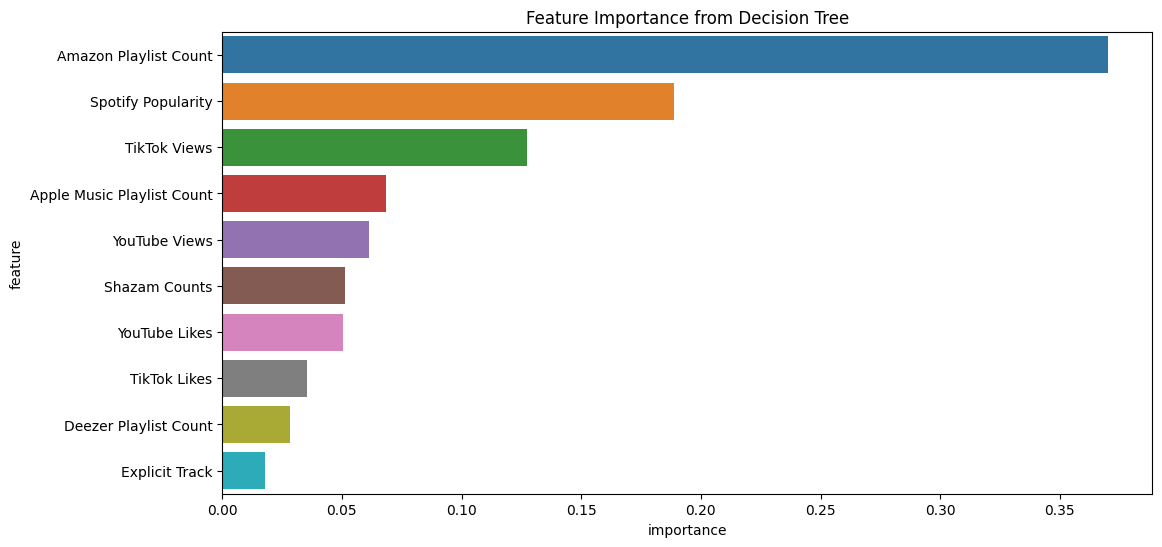

In [37]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

importances = tree_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance from Decision Tree')
plt.show()

## RANDOM FOREST REGRESSOR

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
# Initialize and fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest MAE: 0.6890086756665057
Random Forest RMSE: 1.3061403526934328


In [ ]:
## GBM

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbm_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_gbm = best_model.predict(X_test)

mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mean_squared_error(y_test, y_pred_gbm))

print(f'GBM MAE: {mae_gbm}')
print(f'GBM RMSE: {rmse_gbm}')
print(f'Best GBM Params: {grid_search.best_params_}')


GBM MAE: 0.7108536376067666
GBM RMSE: 1.4130660641012773
Best GBM Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


## XGBoost

In [41]:
import xgboost as xgb
# Initialize and fit the XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f'XGBoost MAE: {mae_xgb}')
print(f'XGBoost RMSE: {rmse_xgb}')

XGBoost MAE: 0.6878774680288593
XGBoost RMSE: 1.3162988828366944


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate performance
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))

print(f'Best XGBoost MAE: {mae_best_xgb}')
print(f'Best XGBoost RMSE: {rmse_best_xgb}')
print(f'Best XGBoost Parameters: {grid_search.best_params_}')

Best XGBoost MAE: 0.7084299886123102
Best XGBoost RMSE: 1.349527969261904
Best XGBoost Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
